# Load & Info & Data Preprocessing

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the sessions dataset
X = pd.read_csv('../data/train_merge_tfidf.csv')
y = pd.read_csv('../data/y.csv')

In [149]:
X

,0,1,2,3,4,5,6,7,8,9,...,513,514,515,516,517,518,519,520,521,522
0,62.0,0.0,3427529.0,2.0,1.0,2014.0,2.0,1.0,2014.0,0.0,...,0.0,0.000000,0.0,0.446518,0.0,0.495216,0.0,0.000000,0.0,0.000000
1,34.0,0.0,207842.0,2.0,1.0,2014.0,2.0,1.0,2014.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.282430,0.0,0.000000,0.0,0.000000
2,34.0,0.0,1135444.0,2.0,1.0,2014.0,2.0,1.0,2014.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.116612,0.0,0.000000,0.0,0.000000
3,34.0,0.0,3755100.0,2.0,1.0,2014.0,2.0,1.0,2014.0,0.0,...,0.0,0.059951,0.0,0.491444,0.0,0.156700,0.0,0.000000,0.0,0.000000
4,34.0,25.0,2555.0,2.0,1.0,2014.0,2.0,1.0,2014.0,0.0,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73810,32.0,0.0,5141396.0,0.0,6.0,2014.0,0.0,6.0,2014.0,23.0,...,0.0,0.000000,0.0,0.382648,0.0,0.043381,0.0,0.101826,0.0,0.087917
73811,34.0,0.0,2878924.0,0.0,6.0,2014.0,0.0,6.0,2014.0,23.0,...,0.0,0.106480,0.0,0.490987,0.0,0.300584,0.0,0.000000,0.0,0.000000
73812,32.0,0.0,342982.0,0.0,6.0,2014.0,0.0,6.0,2014.0,23.0,...,0.0,0.000000,0.0,0.000000,0.0,0.267225,0.0,0.000000,0.0,0.000000
73813,34.0,25.0,341609.0,0.0,6.0,2014.0,0.0,6.0,2014.0,23.0,...,0.0,0.000000,0.0,0.852054,0.0,0.000000,0.0,0.000000,0.0,0.000000


In [150]:
y

,target_column_name
0,other
1,NDF
2,NDF
3,NDF
4,GB
...,...
73810,NDF
73811,NDF
73812,NDF
73813,NDF


## split

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.4, random_state=0)
X_test.shape

(29526, 523)

## selector1

In [152]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2

# selector = SelectKBest(chi2, k='all')
# selector.fit(X_train, y_train)

# selected_feature_indices = selector.get_support(indices=True)

# selected_feature_names = X_train.columns[selected_feature_indices]
# print(selected_feature_names)

In [153]:
# # Mutual Information : utilisée pour évaluer la relation entre chaque caractéristique et la variable cible.
# # Elle mesure la quantité d'information que chaque caractéristique fournit sur la variable cible.

# from sklearn.feature_selection import mutual_info_classif

# mutual_info= mutual_info_classif(X_train, y_train)
# mutual_info = pd.Series (mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

In [154]:
# mutual_info.sort_values(ascending=False).head(23)

## selector3

In [155]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

# SelectKBest: est une methode de sélection de caractéristiques qui permet de sélectionner les K meilleures caractéristiques
# en fonction d'un test statistique 
selector3 = SelectKBest(f_classif, k=23)
selector3.fit(X, y)

selected_feature_indices = selector3.get_support(indices=True)

selected_feature_names = X.columns[selected_feature_indices]

print(selected_feature_names)

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['1', '2', '11', '12', '13', '76', '87', '128', '197', '246', '296',
       '320', '337', '376', '389', '394', '397', '433', '462', '473', '475',
       '479', '522'],
      dtype='object')


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [5 8] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Selected

In [156]:
selected_feature_names

Index(['1', '2', '11', '12', '13', '76', '87', '128', '197', '246', '296',
       '320', '337', '376', '389', '394', '397', '433', '462', '473', '475',
       '479', '522'],
      dtype='object')

In [157]:
X = X[selected_feature_names]

In [158]:
# X = X[:10000]
# y = y[:10000]

In [159]:
X.shape

(73815, 23)

In [160]:
y.shape

(73815, 1)

In [161]:
from sklearn.metrics import make_scorer

# https://www.kaggle.com/davidgasquez/ndcg-scorer

def dcg_score(y_true, y_score, k=5):
    
    """Discounted cumulative gain (DCG) at rank K.

    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (true relevance labels).
    y_score : array, shape = [n_samples, n_classes]
        Predicted scores.
    k : int
        Rank.

    Returns
    -------
    score : float
    """
    
    order = np.argsort(y_score)[::-1]
    y_true = np.take(y_true, order[:k])

    gain = 2 ** y_true - 1

    discounts = np.log2(np.arange(len(y_true)) + 2)
    return np.sum(gain / discounts)


def ndcg_score(ground_truth, predictions, k=5):
    
    """Normalized discounted cumulative gain (NDCG) at rank K.

    Normalized Discounted Cumulative Gain (NDCG) measures the performance of a
    recommendation system based on the graded relevance of the recommended
    entities. It varies from 0.0 to 1.0, with 1.0 representing the ideal
    ranking of the entities.

    Parameters
    ----------
    ground_truth : array, shape = [n_samples]
        Ground truth (true labels represended as integers).
    predictions : array, shape = [n_samples, n_classes]
        Predicted probabilities.
    k : int
        Rank.

    Returns
    -------
    score : float

    Example
    -------
    >>> ground_truth = [1, 0, 2]
    >>> predictions = [[0.15, 0.55, 0.2], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    1.0
    >>> predictions = [[0.9, 0.5, 0.8], [0.7, 0.2, 0.1], [0.06, 0.04, 0.9]]
    >>> score = ndcg_score(ground_truth, predictions, k=2)
    0.6666666666
    """
    
    lb = LabelBinarizer()
    lb.fit(range(predictions.shape[1] + 1))
    T = lb.transform(ground_truth)

    scores = []

    # Iterate over each y_true and compute the DCG score
    for y_true, y_score in zip(T, predictions):
        actual = dcg_score(y_true, y_score, k)
        best = dcg_score(y_true, y_true, k)
        score = float(actual) / float(best)
        scores.append(score)

    return np.mean(scores)


# NDCG Scorer function
ndcg_scorer = make_scorer(ndcg_score, needs_proba=True, k=5)

# Fiting

In [162]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

#https://stackoverflow.com/questions/53782169/random-forest-tuning-with-randomizedsearchcv

params = {
'n_estimators' : [200, 700, 800, 1000, 1200],
'max_depth' : [15, 20, 25, 30, 35, 50],
'min_samples_split' : [2, 3, 5, 8],
'min_samples_leaf' : [1, 2, 5, 10] }

rf = RandomForestClassifier()

clf = RandomizedSearchCV(rf, params, verbose=10,n_jobs=-1,scoring=ndcg_scorer)

In [163]:
clf.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 25, 30, 35, 50],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 3, 5, 8],
                                        'n_estimators': [200, 700, 800, 1000,
                                                         1200]},
                   scoring=make_scorer(ndcg_score, needs_proba=True, k=5),
                   verbose=10)

In [164]:
pred_y = clf.predict_proba(X)

In [165]:
clf.best_params_

{'n_estimators': 1200,
 'min_samples_split': 8,
 'min_samples_leaf': 2,
 'max_depth': 35}

# Train ndcg score

In [166]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_target = le.fit_transform(y['target_column_name'])

y_target

array([11,  7,  7, ...,  7,  7,  7])

In [167]:
from sklearn.preprocessing import LabelBinarizer

#Train ndcg score

s = ndcg_score(y_target, pred_y, k=5)

s

0.8904326061052642

# Evaluation

In [168]:
pred_y = clf.predict(X)

In [169]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the model
accuracy = accuracy_score(y['target_column_name'], pred_y)
report = classification_report(y['target_column_name'], pred_y)

# Print the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7422339632865949
Classification Report:
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       152
          CA       1.00      0.00      0.00       440
          DE       0.00      0.00      0.00       250
          ES       0.93      0.02      0.04       707
          FR       0.98      0.03      0.07      1435
          GB       1.00      0.00      0.00       731
          IT       1.00      0.03      0.06       979
         NDF       0.74      0.98      0.84     45041
          NL       0.00      0.00      0.00       247
          PT       0.00      0.00      0.00        83
          US       0.74      0.51      0.60     20095
       other       0.99      0.10      0.18      3655

    accuracy                           0.74     73815
   macro avg       0.62      0.14      0.15     73815
weighted avg       0.76      0.74      0.69     73815



C:\Users\ayoub\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Submission1

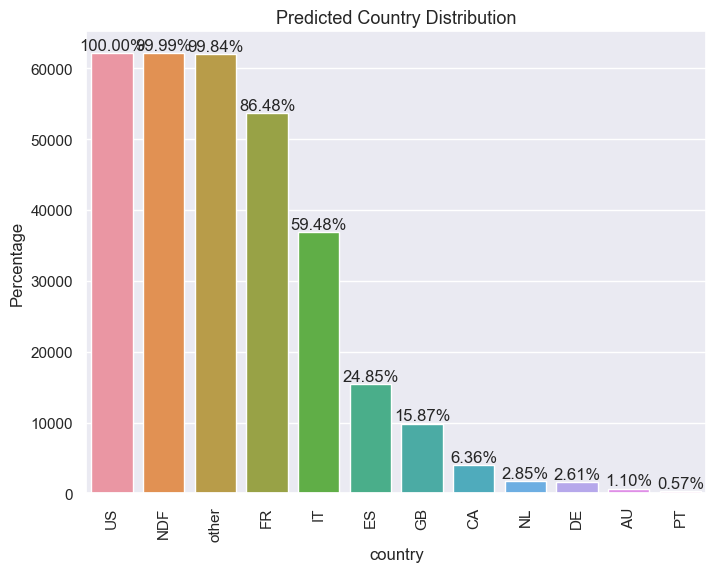

In [170]:
#test csv

# Load and preprocess the test data
test_data = pd.read_csv("../data/test_merge_tfidf.csv")

test_df = pd.read_csv('../data/test_users.csv')

test_id = test_df['id'].values

test_id

# https://www.kaggle.com/kevinwu06/feature-importance-w-xgboost

pred = clf.predict_proba(test_data[selected_feature_names])

ids = []
countries = []

# Taking the 5 classes with highest probabilities

for i in range(len(test_id)):
    idx = test_id[i]
    ids += [idx] * 5
    countries += le.inverse_transform(np.argsort(pred[i])[::-1][:5]).tolist()
    
# Generate submission

sub = pd.DataFrame({"id" : ids,"country" : countries})

sub.to_csv('../data/submission_RF_new.csv', index = False)

import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Calculate percentages
total_samples = len(test_data)
ax = sns.countplot(x='country', data=sub, order=sub['country'].value_counts().index)

# Add percentages to the plot
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_samples*100:.2f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

plt.title("Predicted Country Distribution", size=13)
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Optional: Rotate x-axis labels if needed
plt.show()

In [178]:
# submission = pd.read_csv("../data/sample_submission_NDF.csv")

# # Prepare submission file
# submission['country'] = test_data[['predicted_country']]

# submission.to_csv('../data/submission_RF.csv', index=False)